In [12]:
import numpy as np
def f1(pt):
    x, y = pt[0], pt[1]
    return 100 * (y - x ** 2) ** 2 + 5 * (1 - x) ** 2

def f2(pt):
    x, y = pt[0], pt[1]
    return (x ** 2  + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

def reflection(mid, xr, g, w_):
    w = w_
    if f(xr) < f(g):
        w = xr
    else:
        if f(xr) < f(w):
            w = xr
        c = (w + mid) / np.array([2 for j in range(2)], float)
        if f(c) < f(w):
            w = c
    return w

def expansion(mid, xr, b, w_):
    w = w_         
    if f(xr) < f(b):
        xe = mid + np.array([2 for j in range(2)], float) * (xr - mid)
        if f(xe) < f(xr):
            w = xe
        else:
            w = xr
    return w

def shrink(mid, xr, g, w_):
    w = w_
    if f(xr) > f(g):
        xc = mid + np.array([0.5 for j in range(2)], float) * (w - mid)
        if f(xc) < f(w):
            w = xc    
    return w

def downhill_simplex_method(eps):
    v1 = np.array([0, 0], float)
    v2 = v1 + np.array([0.00025 for i in range(2)], float) * np.array([1, 0], float)
    v3 = v2 + np.array([0.00025 for i in range(2)], float) * np.array([0, 1], float)
    for i in range(1000):
        adict = np.array([[v1[0], v1[1], f(v1)], [v2[0], v2[1], f(v2)], [v3[0], v3[1], f(v3)]], float)
        points = sorted(adict, key=lambda x: x[2])
        
        b = np.array([points[0][0], points[0][1]], float)
        g = np.array([points[1][0], points[1][1]], float)
        w = np.array([points[2][0], points[2][1]], float)
        
        last_best = b
        mid = (g + b) / np.array([2 for j in range(2)], float)
        xr = 2 * mid - w
        w = reflection(mid, xr, g, w)
        w = expansion(mid, xr, b, w)
        w = shrink(mid, xr, g, w)
        
        v1, v2, v3 = w, g, b
        
        if (abs(f(w) - f(last_best)) < eps):
            print("Algorithm takes " + str(i + 1) + " iterations.")
            break
    else:
        print("No appropriate answer was found.")
        
    return b

eps = 1e-6

f = f1
print("Result of downhill simplex method : ")
xmin1 = downhill_simplex_method(eps)
print("xmin: ", xmin1)
print("fmin: ", round(f(xmin1), 6))

f = f2
print("Result of downhill simplex method : ")
xmin2 = downhill_simplex_method(eps)
print("xmin: ", xmin2)
print("fmin: ", round(f(xmin2), 6))

Result of downhill simplex method : 
Algorithm takes 59 iterations.
xmin:  [0.99973714 0.99958271]
fmin:  2e-06
Result of downhill simplex method : 
Algorithm takes 57 iterations.
xmin:  [2.99991748 1.999782  ]
fmin:  1e-06


[0.99973714 0.99958271]


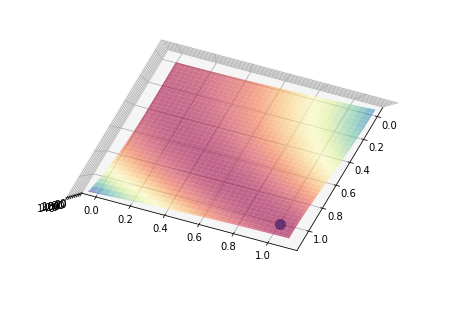

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import *
import pylab

fig = pylab.figure()
x = np.arange (0.0, 1.1, 0.01)
y = np.arange (0.0, 1.1, 0.01)
x, y = np.meshgrid(x, y)

z = np.array([100 for i in range(len(x))], float)* (y - x ** 2) ** 2 + np.array([5 for i in range(len(x))], float) * (np.array([1 for i in range(len(x))], float) - x) ** 2
axes = Axes3D(fig)
print(xmin1)
axes.plot_surface(x, y, z,cmap = cm.Spectral,alpha = 0.6)
axes.scatter(xmin1[0], xmin1[1], 0, s = 100, marker = 'o',cmap='Greens')
axes.view_init(90, 20)

pylab.show()



[2.99991748 1.999782  ]


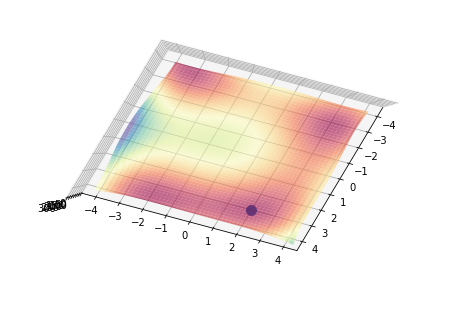

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import *
import pylab

fig = pylab.figure()
x = np.arange (-4, 4, 0.01)
y = np.arange (-4, 4, 0.01)
x, y = np.meshgrid(x, y)

z = (x ** 2  + y - np.array([11 for i in range(len(x))], float)) ** 2 + (x + y ** 2 - np.array([7 for i in range(len(x))], float)) ** 2
axes = Axes3D(fig)
axes.scatter(xmin2[0], xmin2[1], 0, s = 100, marker = 'o', cmap='Greens')
print(xmin2)
axes.view_init(90, 20)

axes.plot_surface(x, y, z,cmap = cm.Spectral, alpha = 0.6)


pylab.show()



In [11]:
import math 
def grad_f1(pt):
    x, y = pt[0], pt[1]
    gx = -400*x*(-x**2 + y) + 10*x - 10
    gy = -200*x**2 + 200*y
    grad = np.array([gx, gy], float)
    return grad

def grad_f2(pt):
    x, y = pt[0], pt[1]
    
    gx = 4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14
    gy = 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22
    grad = np.array([gx, gy], float)
    return grad

def steepest_descent(eps): #7.3
    xk = np.array([0, 0], float)
    k = 1
    
    for i in range(100000):
        xl = xk
        gradient = grad(xl)

        xk = xk - np.array([k for j in range(2)], float) * gradient
        s = gradient[0] * gradient[0] + gradient[1] * gradient[1]
        while (f(xk) > f(xl) - 0.003 * k * s):
            k *= 0.9
            xk = xl
            xk = xk - np.array([k for j in range(2)], float) * gradient
            
        if (s ** 0.5 < eps):
            print("Algorithm takes " + str(i + 1) + " iterations.")
            break
    else:
        print("No appropriate answer was found.")
    return xk

eps = 0.003

f = f1
grad = grad_f1
print("Result of steepest descent  algorithm: ")
xmin = steepest_descent(eps)
print("xmin: ", xmin)
print("fmin: ", round(f(xmin), 10))

f = f2
grad = grad_f2
print("Result of steepest descent  algorithm: ")
xmin = steepest_descent(eps)
print("xmin: ", xmin)
print("fmin: ", round(f(xmin), 10))

Result of steepest descent  algorithm: 
Algorithm takes 1407 iterations.
xmin:  [0.999333   0.99865307]
fmin:  2.2423e-06
Result of steepest descent  algorithm: 
Algorithm takes 32 iterations.
xmin:  [ 3.58440825 -1.84812834]
fmin:  2.15e-08


In [10]:
eps = 0.00001

def dihotomy(xk, d, a = -4, b = 4):
    epsilon = 0.00001
    delta = 0.000005
    while(abs(b-a)>epsilon):
        x1 = (a + b) / 2 - delta / 2
        x2 = (a + b) / 2 + delta / 2
        if f([xk[0] + d[0] * x1,  xk[1] + d[1] * x1]) <  f([xk[0] + d[0] * x2,  xk[1] + d[1] * x2]):
            b = x2
        else:
            a = x1
    return a

def newx(xk, d):
    a = dihotomy(xk, d)
    xk = xk + np.array([a, a], float) * d
    return xk

def fletcher_reeves():#8.1
    xk = np.array([-1, 0], float)
    d = -grad(xk)
    for i in range(200):
        xkl = xk
        if (i + 1) % 2 == 0:
            xk = newx(xk, d)
            d = -grad(xk)
        else:
            xk = newx(xk, d)
            b = np.linalg.norm(grad(xk)) ** 2 / np.linalg.norm(grad(xkl)) ** 2
            d = -grad(xk) + np.array([b, b], float) * d

        if (np.linalg.norm(grad(xk)) < eps):
            print("Algorithm takes " + str(i + 1) + " iterations.")
            break
    else:
        print("No appropriate answer was found.")
    return xk


f = f1
grad = grad_f1
print("Result of fletcher reeves  algorithm: ")
xmin = fletcher_reeves()
print("xmin: ", xmin)
print("fmin: ", round(f(xmin), 10))


f = f2
grad = grad_f2
print("Result of fletcher reeves algorithm: ")
xmin = fletcher_reeves()
print("xmin: ", xmin)
print("fmin: ", round(f(xmin), 10))

Result of fletcher reeves  algorithm: 
Algorithm takes 31 iterations.
xmin:  [0.9999986  0.99999718]
fmin:  0.0
Result of fletcher reeves algorithm: 
Algorithm takes 8 iterations.
xmin:  [-2.80511809  3.13131252]
fmin:  0.0


In [9]:
def grad2_f1(pt):
    x, y = pt[0], pt[1]
    gxx = 1200*x**2 - 400*y + 10
    gyy = 200
    gxy = -400*x
    grad = np.array([gxx, gxy, gxy, gyy], float)
    return grad

def grad2_f2(pt):
    x, y = pt[0], pt[1]
    gxx = 12*x**2 + 4*y - 42
    gyy = 4*x + 12*y**2 - 26
    gxy = 4*x + 4*y
    grad = np.array([gxx, gxy, gxy, gyy], float)
    return grad

def newton(eps):#9
    xk = np.array([-30, -30], float).reshape((2,1))
    xk1 = xk - np.dot(np.linalg.inv(grad2(xk).reshape((2,2))),grad(xk).reshape((2,1)))

    for i in range(1000):
        xk = xk1
        xk1 = xk - np.dot(np.linalg.inv(grad2(xk).reshape((2,2))),grad(xk).reshape((2,1)))

        if (abs(f(xk.flatten()) - f(xk1.flatten())) < eps and np.linalg.norm(xk - xk1) < eps):
            print("Algorithm takes " + str(i + 1) + " iterations.")
            break
    else:
        print("No appropriate answer was found.")

    return xk.flatten()

eps = 1e-10
f = f1
grad = grad_f1
grad2 = grad2_f1
print("Result of newton method : ")
xmin = newton(eps)
print("xmin: ", xmin)
print("fmin: ", round(f(xmin), 10))

f = f2
grad = grad_f2
grad2 = grad2_f2
print("Result of newton method : ")
xmin = newton(eps)
print("xmin: ", xmin)
print("fmin: ", round(f(xmin), 10))

Result of newton method : 
Algorithm takes 5 iterations.
xmin:  [1. 1.]
fmin:  0.0
Result of newton method : 
Algorithm takes 11 iterations.
xmin:  [-3.77931025 -3.28318599]
fmin:  0.0
